# Lending Case Study

In [1]:
# importing required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the file
loanDf = pd.read_csv('loan.csv')
loanDf.shape

(39717, 111)

In [3]:
# Top 5 data rows
pd.set_option("display.max_columns", 111)
loanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Data types of each column
loanDf.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data Cleaning, Transformations

In [5]:
# Checking for null values
pd.set_option("display.max_rows", 111)
loanDf.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# null values percentage wise
nullValuesPercentageColumn =(loanDf.isnull().sum(axis=0)/len(loanDf))*100
nullValuesPercentageColumn

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [7]:
# There are too many columns with null data.
# Removing the columns that have all the null values
loanDf = loanDf.dropna(how='all', axis=1)
loanDf.shape

(39717, 57)

In [8]:
# We can also remove columns that have almost all values as null.
# From the percentage list above we can see that mths_since_last_delinq, mths_since_last_record, next_pymnt_d have
# too many null values, so they can be removed.
columnsToDrop =  ["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]

loanDf.drop(labels = columnsToDrop, axis =1, inplace=True)
loanDf.shape

(39717, 54)

In [9]:
# Checking for unique values
loanDf.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [10]:
# columns with very less unique values are not useful, removing those columns.
minUniqueValueCols = ["tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
                      "policy_code", "collections_12_mths_ex_med", "initial_list_status", "pymnt_plan"]

loanDf.drop(labels = minUniqueValueCols, axis =1, inplace=True)
loanDf.shape

(39717, 45)

In [11]:
# Also, member_id, url, emp_title, desc have high unique values and not seeing any value in the analysis.
maxUniqueValueColsNotUseful = ["member_id", "url", "emp_title", "desc"]

loanDf.drop(labels = maxUniqueValueColsNotUseful, axis =1, inplace=True)
loanDf.shape

(39717, 41)

In [12]:
# Removing % from int_rate, revol_util and removing non numeric characters from emp_length
loanDf['int_rate'] = loanDf['int_rate'].str.replace('[%]', '')
loanDf['revol_util'] = loanDf['revol_util'].str.replace('[%]', '')
loanDf['emp_length'] = loanDf['emp_length'].str.replace('[^0-9]+', '')

loanDf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [13]:
# na value available in emp_length column, updating na to 0
loanDf.emp_length.fillna('0', inplace=True)

In [14]:
# Converting columns containing numeric data but of object data type
objectToNumeric = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt', 'revol_util']
loanDf[objectToNumeric] = loanDf[objectToNumeric].apply(pd.to_numeric)

In [15]:
loanDf.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp           

In [16]:
# Parsing issue_d data and derivng new columns - month and year
loanDf.issue_d = pd.to_datetime(loanDf.issue_d, format='%b-%y')
loanDf['issue_d_year'] = loanDf['issue_d'].dt.year
loanDf['issue_d_month'] = loanDf['issue_d'].dt.month

print(loanDf[['issue_d', 'issue_d_year', 'issue_d_month']].head())
print(loanDf['issue_d'].dtypes)

     issue_d  issue_d_year  issue_d_month
0 2011-12-01          2011             12
1 2011-12-01          2011             12
2 2011-12-01          2011             12
3 2011-12-01          2011             12
4 2011-12-01          2011             12
datetime64[ns]


In [17]:
print ("Before dropping duplicates: ", loanDf.shape)
# Drop if any duplicate rows are there
loanDf.drop_duplicates()
print ("After dropping duplicates: ", loanDf.shape)

Before dropping duplicates:  (39717, 43)
After dropping duplicates:  (39717, 43)


In [18]:
# Updated data
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  object        
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               39717 non-null  int64         
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

# Data analysis

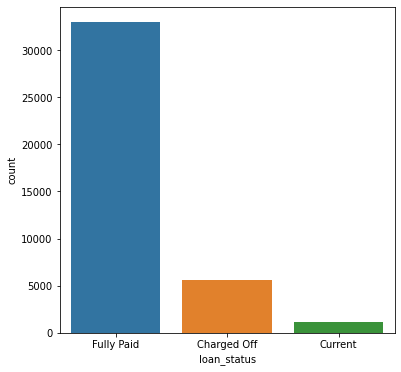

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [19]:
## loan_status analysis
plt.figure(figsize=(6, 6))
sns.countplot(x = loanDf["loan_status"])
plt.show()
print(loanDf.loan_status.value_counts())

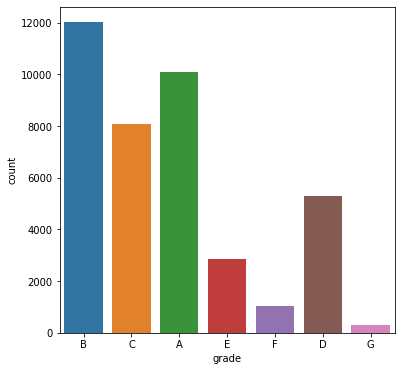

In [20]:
# Grade of loans
plt.figure(figsize=(6, 6))
sns.countplot(x='grade', data=loanDf)
plt.show()

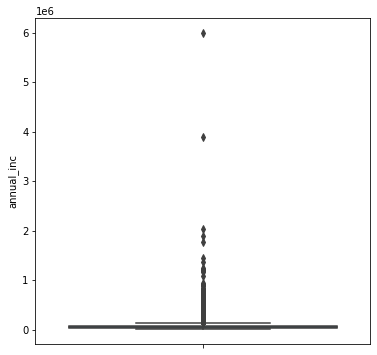

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [21]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=loanDf.annual_inc)
plt.show()
print(loanDf['annual_inc'].describe())

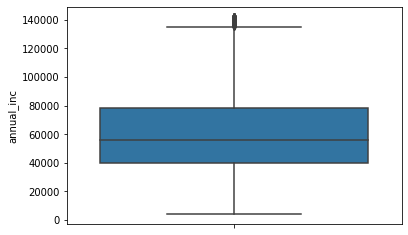

count     37743.000000
mean      61071.860572
std       27830.995882
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64


In [22]:
# removing outliers
annual_income = loanDf['annual_inc'].quantile(0.95)
loanDf = loanDf[loanDf.annual_inc <= annual_income]
sns.boxplot(y=loanDf.annual_inc)
plt.show()

print(loanDf['annual_inc'].describe())

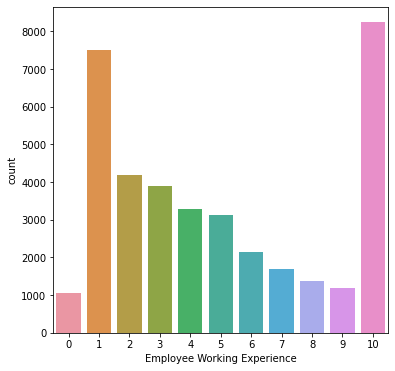

In [23]:
plt.figure(figsize=(6, 6))
sns.countplot(x='emp_length', data=loanDf)
plt.xlabel('Employee Working Experience')
plt.show()

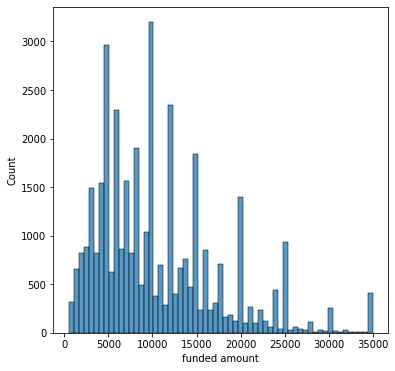

In [24]:
plt.figure(figsize=(6, 6))
sns.histplot(x=loanDf['funded_amnt'])
plt.xlabel('funded amount')
plt.show()

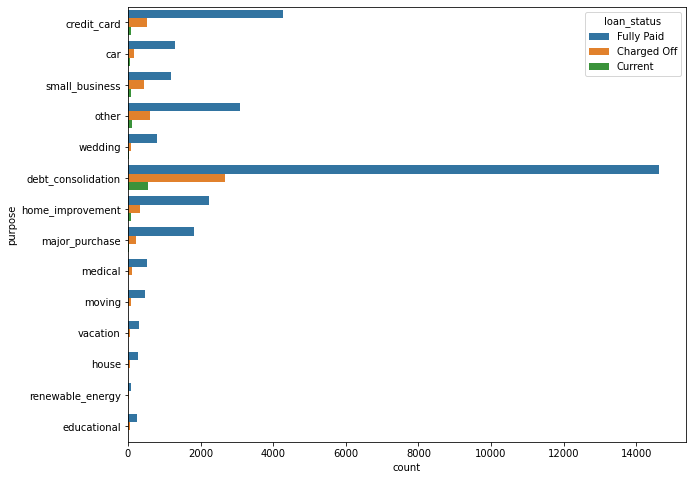

In [25]:
# purpose of loans
plt.figure(figsize=(10, 8))
sns.countplot(y="purpose", hue='loan_status', data=loanDf)
plt.show()

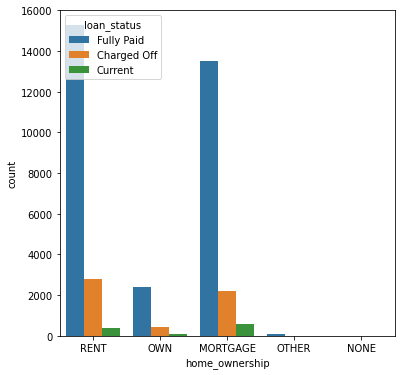

In [26]:
# Home ownership
plt.figure(figsize=(6, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loanDf)
plt.show()

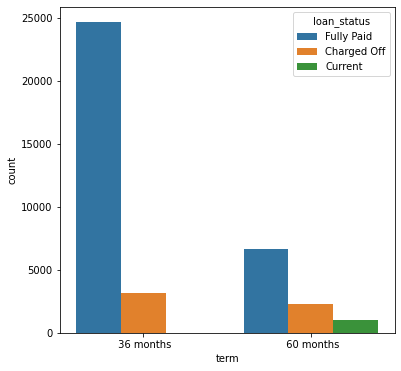

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(x="term", data=loanDf, hue='loan_status')
plt.show()

loan_status annual_income_bins  Charged Off  Current  Fully Paid
0                      0-10000           20        1          78
1                  10000-20000          217        8         865
2                  20000-30000          602       64        2769
3                  30000-40000          912      106        4235
4                  40000-50000          862      176        4829
5                  50000-60000          867      169        4705
6                  60000-70000          559      125        3537
7                  70000-80000          465      115        3060
8                  80000-90000          305      106        2205
9                       90000+          612      184        4985


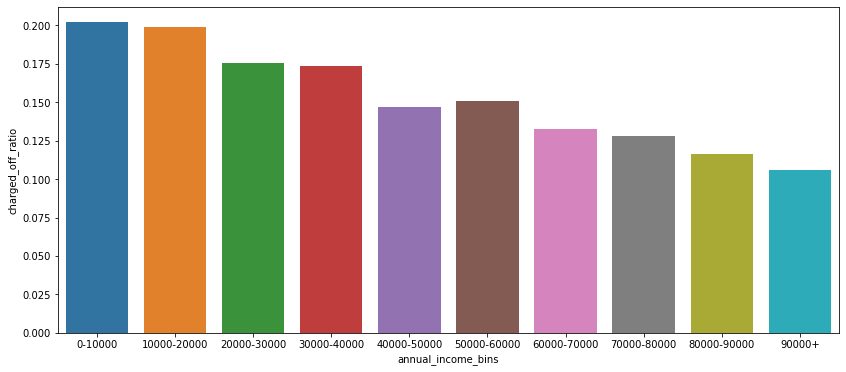

In [28]:
loanDf['annual_income_bins'] = pd.cut(loanDf['annual_inc'], [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 1000000], labels=['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000+'])

# Data in terms of percentages
annual_income = loanDf.groupby(['annual_income_bins', 'loan_status']).loan_status.count().unstack().reset_index()
print (annual_income)
annual_income['total_count'] = annual_income['Charged Off'] + annual_income['Fully Paid'] + annual_income['Current'] 
annual_income['charged_off_ratio'] = annual_income['Charged Off'] / annual_income['total_count']

plt.figure(figsize=(14,6))
sns.barplot(x='annual_income_bins', y='charged_off_ratio', data=annual_income)
plt.show()

# People who are in the lower income range has a high chances of defaulting the loan when compared with people with higher income range

loan_status        term  Charged Off  Current  Fully Paid
0             36 months       3117.0      NaN     24631.0
1             60 months       2304.0   1054.0      6637.0


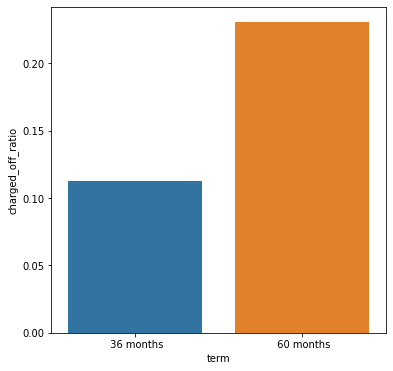

In [30]:
# Let's see how term affects the defaulting 
employment_term_df = loanDf.groupby(['term', 'loan_status']).loan_status.count().unstack().reset_index()
print (employment_term_df)
employment_term_df['Current'] = employment_term_df['Current'].fillna(0)

employment_term_df['total_count'] = employment_term_df['Charged Off'] + employment_term_df['Fully Paid'] + employment_term_df['Current']
employment_term_df['charged_off_ratio'] = employment_term_df['Charged Off'] / employment_term_df['total_count']

plt.figure(figsize=(6, 6))
sns.barplot(x='term', y='charged_off_ratio', data=employment_term_df)
plt.show()

# People who take loan for 60 months have a higher chance of defaulting the loan.

loan_status  emp_length  Charged Off  Current  Fully Paid
0                     0          225       41         789
1                     1         1066      135        6312
2                     2          548       91        3557
3                     3          537       76        3293
4                     4          443       90        2759
5                     5          441       81        2607
6                     6          295       57        1781
7                     7          252       58        1392
8                     8          194       40        1151
9                     9          150       31        1004
10                   10         1270      354        6623


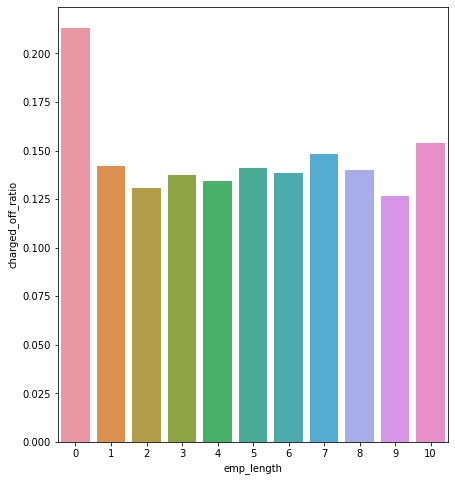

In [31]:
# Let's see how employment length affects the defaulting 
employment_ln_df = loanDf.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()
print (employment_ln_df)

employment_ln_df['total_count'] = employment_ln_df['Charged Off'] + employment_ln_df['Fully Paid'] + employment_ln_df['Current'] 
employment_ln_df['charged_off_ratio'] = employment_ln_df['Charged Off'] / employment_ln_df['total_count']

plt.figure(figsize=(7, 8))
sns.barplot(x='emp_length', y='charged_off_ratio', data=employment_ln_df)
plt.show()

# People with 0-1 years of experience has higher chances of defaulting the loan.

loan_status             purpose  Charged Off  Current  Fully Paid
0                           car        159.0     50.0      1291.0
1                   credit_card        519.0     97.0      4267.0
2            debt_consolidation       2679.0    548.0     14637.0
3                   educational         54.0      NaN       258.0
4              home_improvement        322.0     82.0      2242.0
5                         house         55.0     12.0       283.0
6                major_purchase        217.0     35.0      1832.0
7                       medical        104.0      9.0       537.0
8                        moving         90.0      7.0       460.0
9                         other        605.0    116.0      3096.0
10             renewable_energy         18.0      1.0        77.0
11               small_business        454.0     72.0      1173.0
12                     vacation         52.0      6.0       313.0
13                      wedding         93.0     19.0       802.0


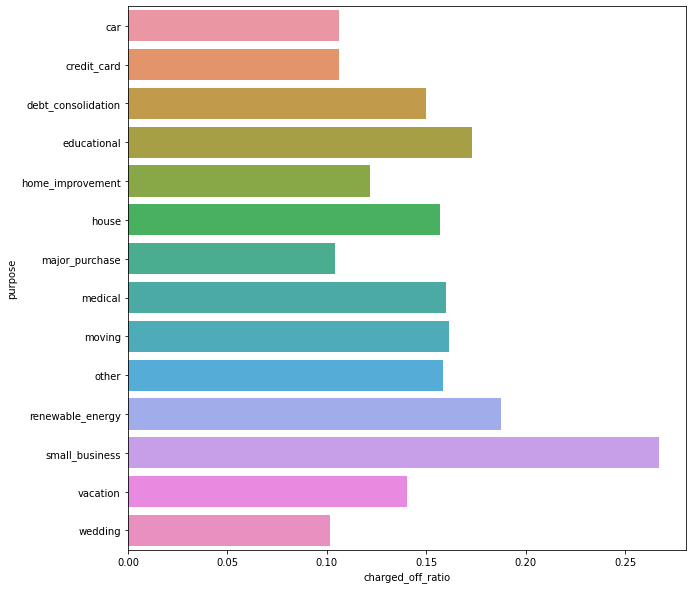

In [32]:
# Let's understand how purpose affects.
purpose_loan_df = loanDf.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
print (purpose_loan_df)
purpose_loan_df['Current'] = purpose_loan_df['Current'].fillna(0)

purpose_loan_df['total_count'] = purpose_loan_df['Charged Off'] + purpose_loan_df['Fully Paid'] + purpose_loan_df['Current']
purpose_loan_df['charged_off_ratio'] = purpose_loan_df['Charged Off'] / purpose_loan_df['total_count']
plt.figure(figsize=(10, 10))
sns.barplot(x='charged_off_ratio', y='purpose', data=purpose_loan_df)
plt.show()

# People availing loan for Small Buisnesses has high chances of defaulting it.

loan_status int_rate_bins  Charged Off  Current  Fully Paid
0                   0-7.5          254        7        4914
1                  7.5-10          558       68        6108
2                 10-12.5         1196      255        7720
3                 12.5-15         1439      240        7041
4                 15-17.5         1133      200        3723
5                   17.5+          573      202        1355


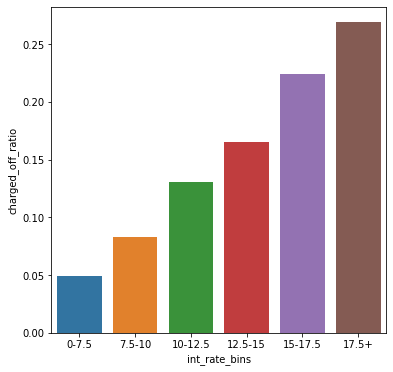

In [33]:
# Let's see interest rates
loanDf['int_rate_bins'] = pd.cut(loanDf['int_rate'], [0, 7.5, 10, 12.5, 15, 17.5, 20], labels=['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15-17.5', '17.5+'])

interest_loan_df = loanDf.groupby(['int_rate_bins', 'loan_status']).loan_status.count().unstack().reset_index()
print (interest_loan_df)

interest_loan_df['total_count'] = interest_loan_df['Charged Off'] + interest_loan_df['Fully Paid'] + interest_loan_df['Current']
interest_loan_df['charged_off_ratio'] = interest_loan_df['Charged Off'] / interest_loan_df['total_count']

plt.figure(figsize=(6, 6))
sns.barplot(x='int_rate_bins', y='charged_off_ratio', data=interest_loan_df)
plt.show()

# Loans given for high interest rate have a high chance of being charged off.

loan_status grade  Charged Off  Current  Fully Paid
0               A          593       39        9063
1               B         1378      325        9732
2               C         1325      248        6161
3               D         1081      208        3759
4               E          660      163        1788
5               F          289       57         597
6               G           95       14         168


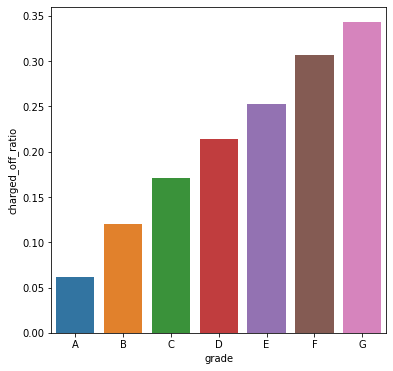

In [34]:
grade_loan_df = loanDf.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
print (grade_loan_df)

grade_loan_df['total_count'] = grade_loan_df['Charged Off'] + grade_loan_df['Fully Paid'] + grade_loan_df['Current'] 
grade_loan_df['charged_off_ratio'] = grade_loan_df['Charged Off'] / grade_loan_df['total_count']

plt.figure(figsize=(6, 6))
sns.barplot(x='grade', y='charged_off_ratio', data=grade_loan_df)
plt.show()

loan_status  pub_rec_bankruptcies  Charged Off  Current  Fully Paid
0                             0.0         4946     1018       29480
1                             1.0          361       35        1239
2                             2.0            2        1           3


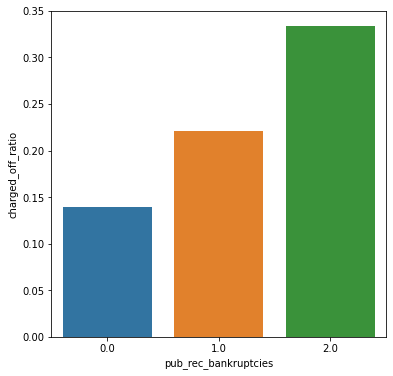

In [35]:
# public bankruptcy
public_bankruptcy_loan_df = loanDf.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().reset_index()
print(public_bankruptcy_loan_df)

public_bankruptcy_loan_df['total_count'] = public_bankruptcy_loan_df['Charged Off'] + public_bankruptcy_loan_df['Fully Paid'] + public_bankruptcy_loan_df['Current'] 
public_bankruptcy_loan_df['charged_off_ratio'] = public_bankruptcy_loan_df['Charged Off'] / public_bankruptcy_loan_df['total_count']

plt.figure(figsize=(6, 6))
sns.barplot(x='pub_rec_bankruptcies', y='charged_off_ratio', data=public_bankruptcy_loan_df)
plt.show()

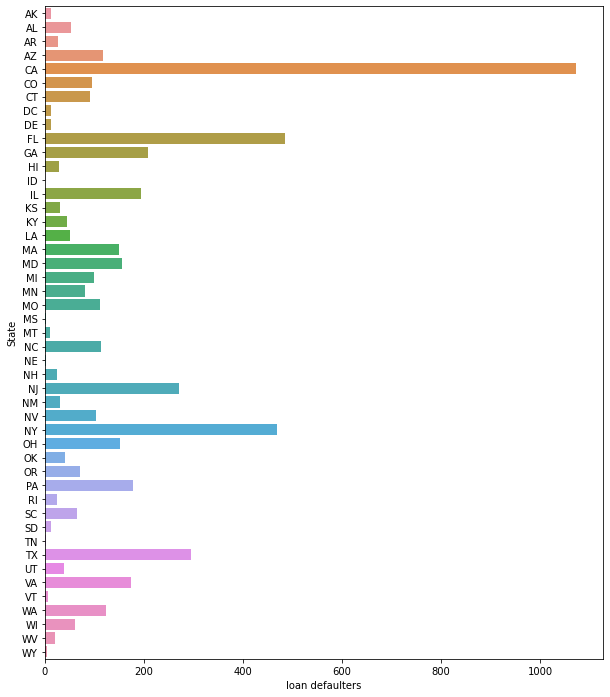

In [36]:
# how state is responsible for loan default
plt.figure(figsize=(10,12))
filtered_data = loanDf[loanDf['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
sns.barplot(y='addr_state', x='loan_status', data=filtered_data)
plt.xlabel('loan defaulters')
plt.ylabel('State')
plt.show()

# If a person applying for a loan is from California, high chance of defaulting the loan when compraed with other regions.

loan_status verification_status  Charged Off  Current  Fully Paid
0                  Not Verified         2097      225       14190
1               Source Verified         1373      282        7789
2                      Verified         1951      547        9289


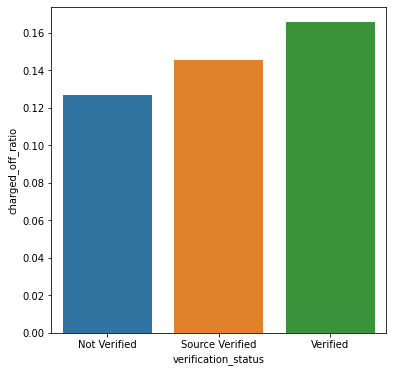

In [37]:
# verification status
verification_status_loan_df = loanDf.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().reset_index()
print(verification_status_loan_df)

verification_status_loan_df['total_count'] = verification_status_loan_df['Charged Off'] + verification_status_loan_df['Fully Paid'] + verification_status_loan_df['Current'] 
verification_status_loan_df['charged_off_ratio'] = verification_status_loan_df['Charged Off'] / verification_status_loan_df['total_count']

plt.figure(figsize=(6, 6))
sns.barplot(x='verification_status', y='charged_off_ratio', data=verification_status_loan_df)
plt.show()

loan_status dti_rate_bins  Charged Off  Current  Fully Paid
0                     0-5          561       79        3896
1                    5-10          945      170        6332
2                   10-15         1351      242        7825
3                   15-20         1346      273        7187
4                   20-25         1103      232        5358
5                     25+           87       53         528


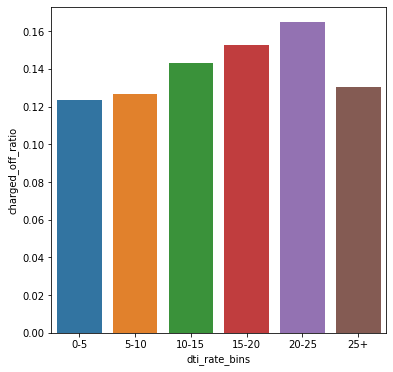

In [38]:
# Let's check dti
loanDf['dti_rate_bins'] = pd.cut(loanDf['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

dti_loan_df = loanDf.groupby(['dti_rate_bins', 'loan_status']).loan_status.count().unstack().reset_index()
print (dti_loan_df)

dti_loan_df['total_count'] = dti_loan_df['Charged Off'] + dti_loan_df['Fully Paid'] + dti_loan_df['Current']
dti_loan_df['charged_off_ratio'] = dti_loan_df['Charged Off'] / dti_loan_df['total_count']

plt.figure(figsize=(6, 6))
sns.barplot(x='dti_rate_bins', y='charged_off_ratio', data=dti_loan_df)
plt.show()

loan_status  inq_last_6mths  Charged Off  Current  Fully Paid
0                         0         2199      547       15676
1                         1         1615      286        8531
2                         2          910      147        4436
3                         3          592       59        2206
4                         4           51       10         240
5                         5           26        2         108
6                         6           15        1          42
7                         7           10        1          22
8                         8            3        1           7


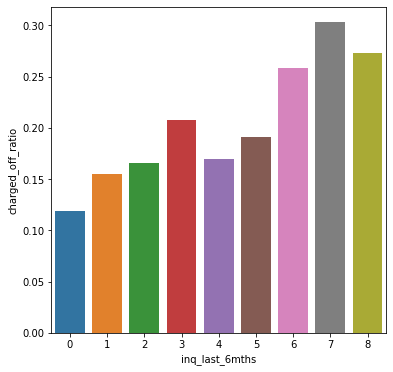

In [39]:
# Let's check inquries
inquiries_loan_df = loanDf.groupby(['inq_last_6mths', 'loan_status']).loan_status.count().unstack().reset_index()
print(inquiries_loan_df)

inquiries_loan_df['total_count'] = inquiries_loan_df['Charged Off'] + inquiries_loan_df['Fully Paid'] + inquiries_loan_df['Current'] 
inquiries_loan_df['charged_off_ratio'] = inquiries_loan_df['Charged Off'] / inquiries_loan_df['total_count']

plt.figure(figsize=(6, 6))
sns.barplot(x='inq_last_6mths', y='charged_off_ratio', data=inquiries_loan_df)
plt.show()

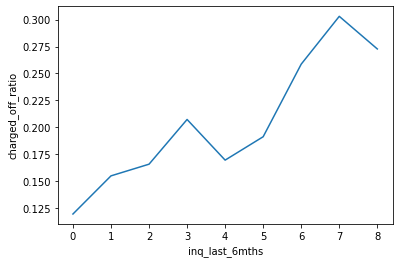

In [43]:
sns.lineplot(x=inquiries_loan_df.inq_last_6mths,y=inquiries_loan_df.charged_off_ratio)
plt.show()

In [51]:
loan_per_type=loanDf.pivot_table(values='loan_amnt',index='purpose',columns='loan_status',aggfunc='sum').sum(axis=1)

In [54]:
loan_pecentage_per_type=100*loan_per_type/loan_per_type.sum()
loan_pecentage_per_type

purpose
car                    2.444605
credit_card           13.592198
debt_consolidation    53.968327
educational            0.503277
home_improvement       6.905596
house                  1.044302
major_purchase         3.989217
medical                1.254461
moving                 0.831036
other                  7.225325
renewable_energy       0.195101
small_business         5.407679
vacation               0.484415
wedding                2.154461
dtype: float64

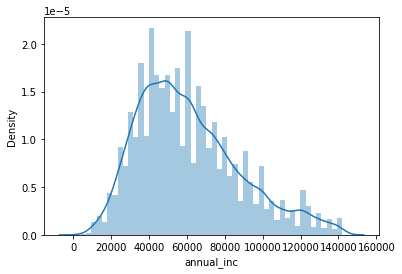

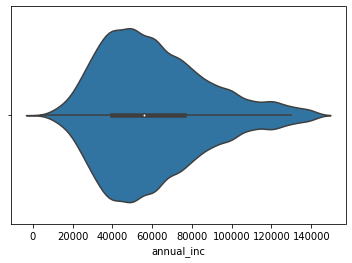

In [61]:
loan_debt=loanDf[loanDf.purpose=='debt_consolidation']
sns.distplot(loan_debt.annual_inc)
plt.show()
sns.violinplot(loan_debt.annual_inc)
plt.show()

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

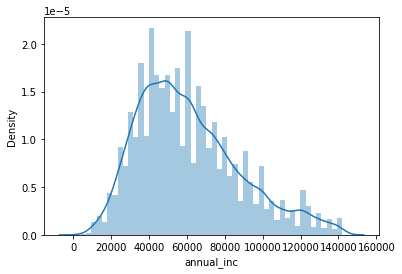